In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import seaborn as sns

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

# Future Warning 메시지 제거
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

apple gothic


In [10]:
df = pd.read_csv('../data/human_info.csv', encoding='cp949')
df.head()

,gender,age,marriage,religion,income
0,남자,40,이혼,있슴,135
1,남자,40,이혼,있슴,196
2,남자,40,이혼,있슴,193
3,남자,40,이혼,없슴,159
4,남자,40,이혼,없슴,195


### 결혼 컬럼에 대한 빈도 수 그래프

Text(0.5, 1.0, '결혼 유무에 따른 빈도')

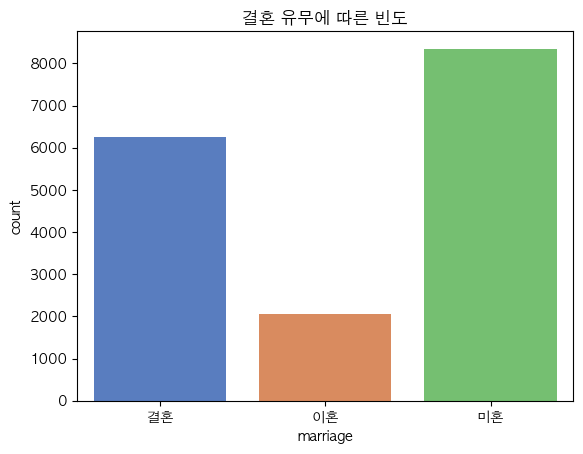

In [13]:
order = ['결혼', '이혼', '미혼']

ax = plt.figure()
ax = sns.countplot(data=df,
              x='marriage',
              order = order,
              palette = 'muted')
ax.set_title('결혼 유무에 따른 빈도')

### 결혼 컬럼에 대한 빈도 수를 성별로 분류한 그래프

Text(0.5, 1.0, '결혼 유무에 따른 빈도')

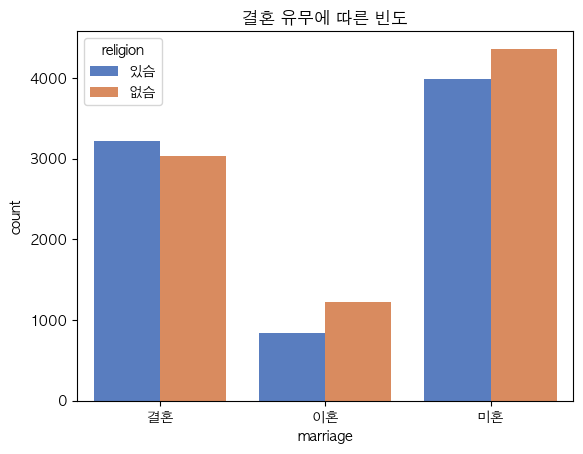

In [14]:
order = ['결혼', '이혼', '미혼']

ax = plt.figure()
ax = sns.countplot(data=df,
              x='marriage',
              order = order,
              hue = 'religion',
              palette = 'muted')
ax.set_title('결혼 유무에 따른 빈도')

### 나이에 대한 히스토그램과 커널 밀도 함수

Text(0.5, 1.0, 'kde와 histogram')

<Figure size 1000x500 with 0 Axes>

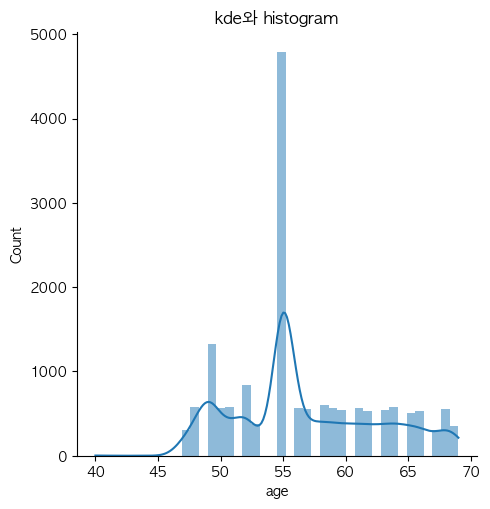

In [29]:
ax = plt.figure(figsize = (10, 5))
ax = sns.displot(data=df,
                 x='age',
                 kde = True,
                 linewidth=0)
plt.title('kde와 histogram')

### 결혼 유무와 성별에 대한 히트맵

Text(0.5, 1.0, '결혼 유무와 성별에 대한 히트맵')

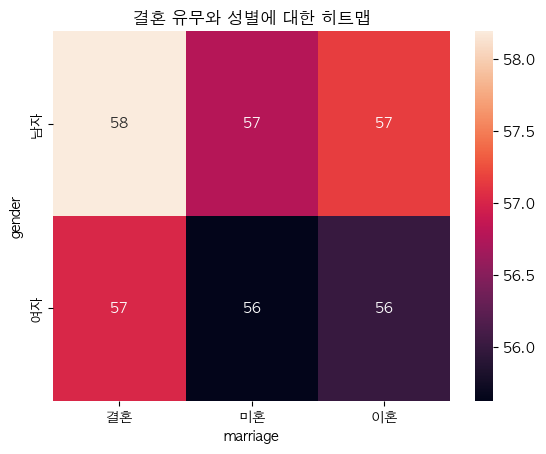

In [38]:
pivot = df.pivot_table(index = 'gender', 
               columns = 'marriage',
               values = 'age')

plt.figure()
sns.heatmap(data=pivot,
            annot = True
            )
plt.title('결혼 유무와 성별에 대한 히트맵')

### 나이의 소득에 대한 상관관계

Text(0.5, 1.0, '상관관계 시각화')

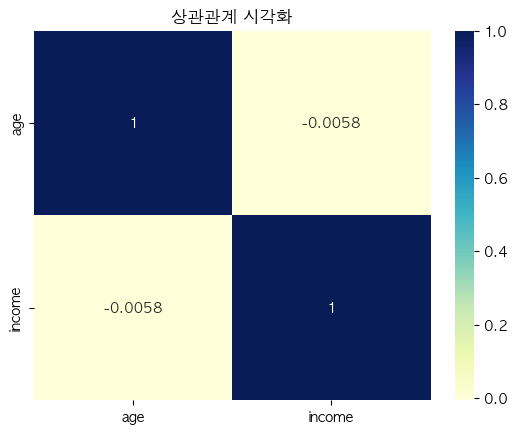

In [44]:
corr  = df[['age', 'income']].corr()

plt.figure()
sns.heatmap(data=corr,
            annot=True,
            cmap='YlGnBu')
plt.title('상관관계 시각화')

### 나이의 소득에 대한 결혼 여부 pairplot 그래프

<Figure size 640x480 with 0 Axes>

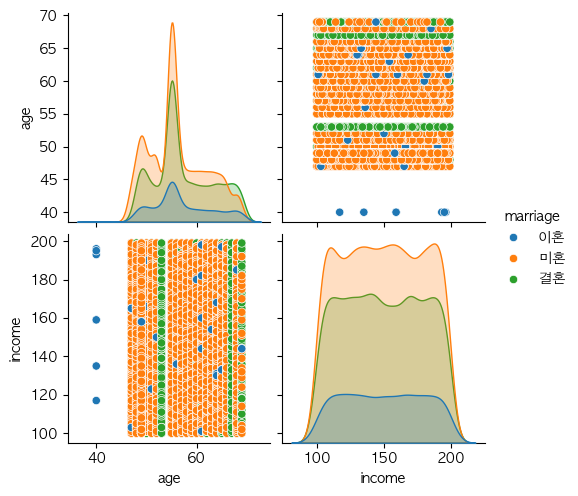

In [48]:
new_df = df[['age', 'marriage', 'income']]

plt.figure()
sns.pairplot(data=new_df,
             hue = 'marriage')

### 나이에 대한 바이올린 그래프

Text(0.5, 1.0, '나이에 대한 바이올린 그래프')

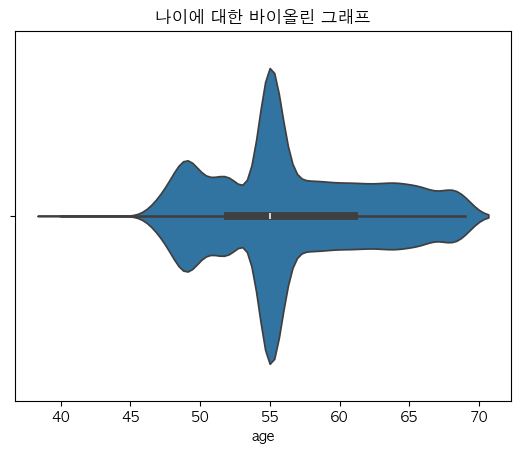

In [51]:
plt.figure()
sns.violinplot(x = 'age',
               data = df)
plt.title('나이에 대한 바이올린 그래프')

### 나이와 소득에 대한 결혼 유무별 lmplot 그래프

<Figure size 640x480 with 0 Axes>

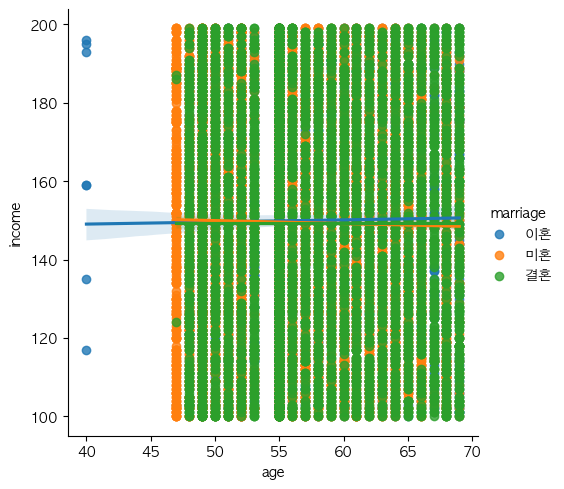

In [55]:
plt.figure()
sns.lmplot(data=new_df,
           x = 'age',
           y = 'income',
           hue = 'marriage')

### 나이와 소득에 대한 결혼 유무별 relplot 그래프

<Figure size 640x480 with 0 Axes>

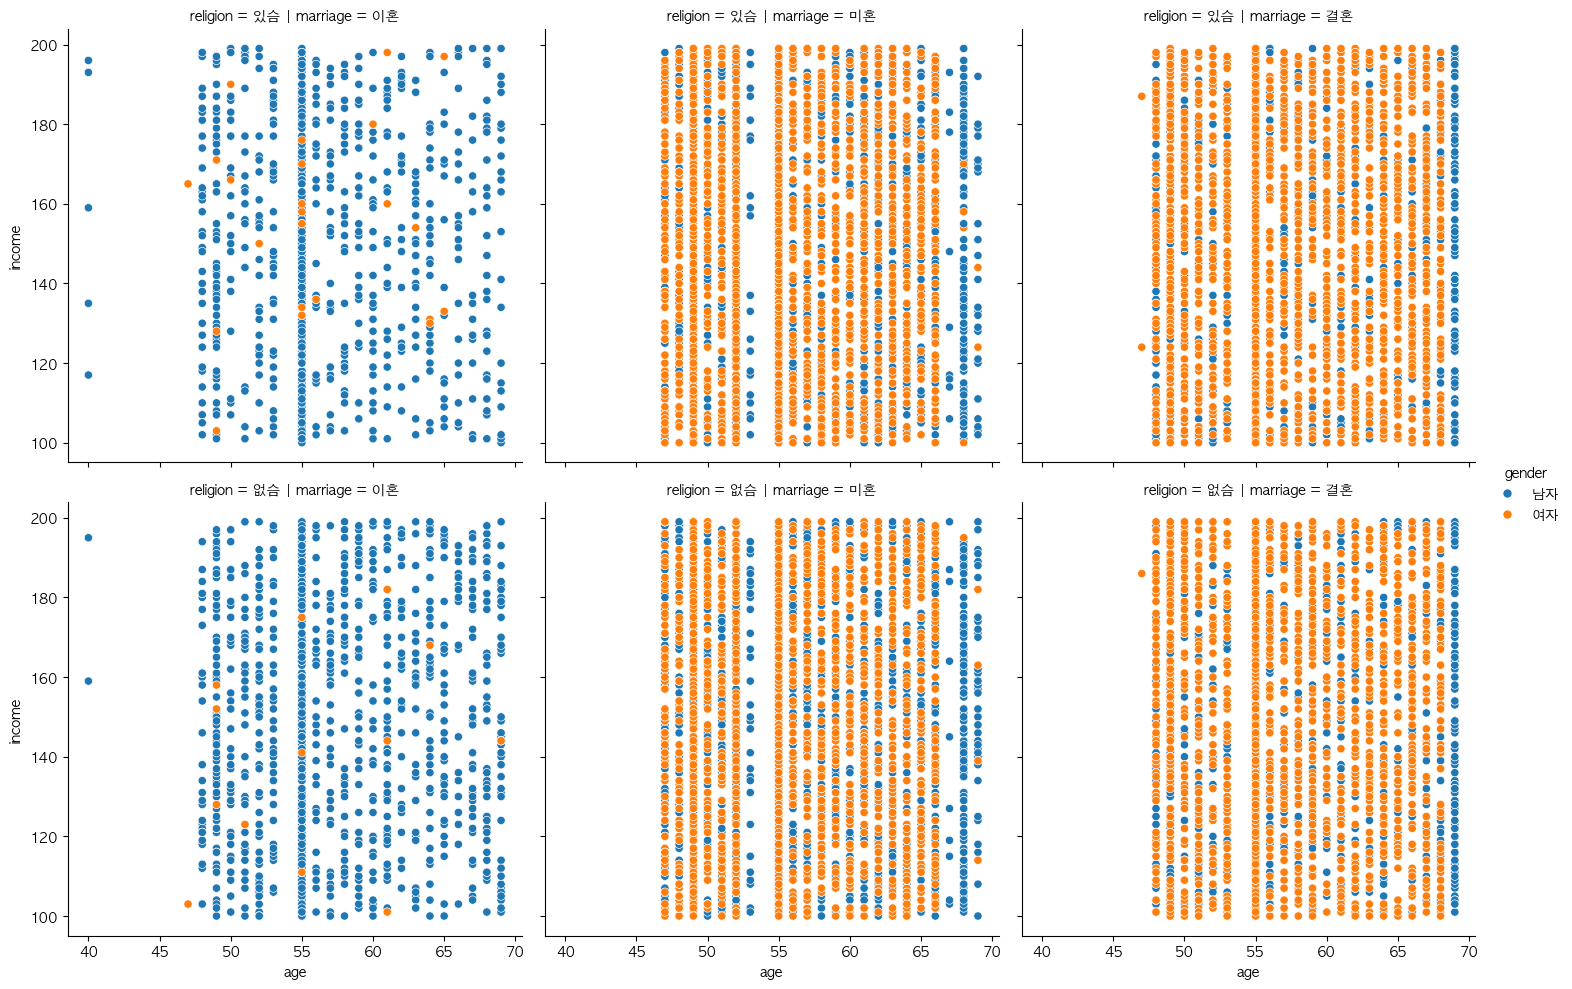

In [61]:
plt.figure()
sns.relplot(data=df,
            x='age',
            y='income',
            col='marriage',
            row='religion',
            hue='gender')

### 소득과 성별에 대한 종교 유무별 그래프

Text(0.5, 1.0, '소득에 따른 성별 그래프')

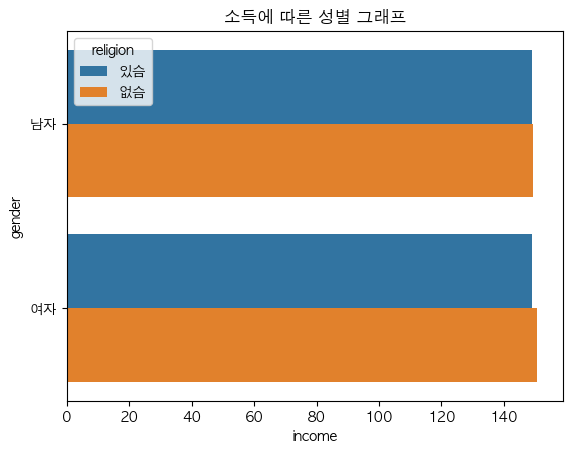

In [66]:
plt.figure()
sns.barplot(data=df,
            x='income',
            y='gender',
            hue='religion',
            errwidth=0)
plt.title('소득에 따른 성별 그래프')